In [9]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [11]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHF/


In [12]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "T_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHF/Ridge_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


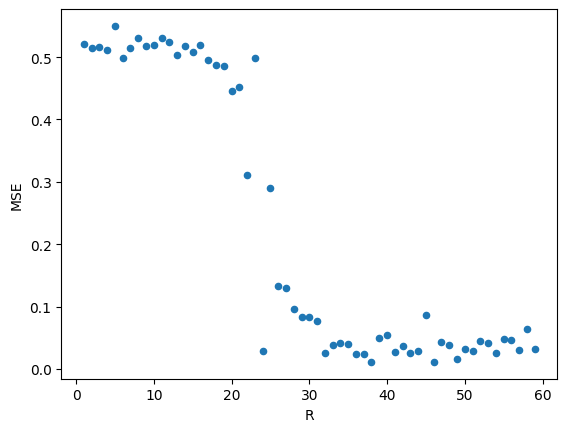

In [13]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [14]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.521261
2      0.514112
3      0.515517
4      0.511227
5      0.550046
6      0.499220
7      0.514460
8      0.531250
9      0.517421
10     0.518984
11     0.530258
12     0.524553
13     0.503055
14     0.517355
15     0.508629
16     0.519618
17     0.494908
18     0.486588
19     0.485894
20     0.446261
21     0.452373
22     0.310702
23     0.499278
24     0.029249
25     0.289852
26     0.132374
27     0.129193
28     0.096174
29     0.083810
30     0.082996
31     0.077338
32     0.025525
33     0.038717
34     0.040821
35     0.039207
36     0.024333
37     0.023518
38     0.011772
39     0.049636
40     0.054238
41     0.027216
42     0.036911
43     0.026209
44     0.029038
45     0.086926
46     0.011130
47     0.043127
48     0.038818
49     0.015233
50     0.032605
51     0.028069
52     0.045120
53     0.041178
54     0.025250
55     0.048024
56     0.045562
57     0.029926
58     0.064561
59     0.031273


0    0.01113
Name: 46,

In [15]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

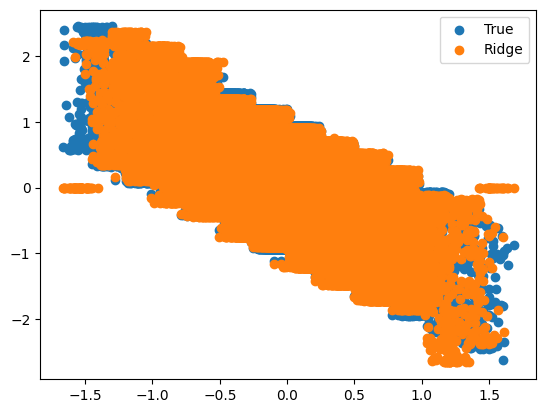

In [16]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()